## Building a model for BDS Final project

In [6]:
%config Completer.use_jedi = False

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
import os

In [3]:
# import data
print(os.getcwd())

data_2005 = pd.read_csv('../data/2005_data.csv')

/Users/joshloesch/school/fall2021/bds/bds_final_project/notebooks


/Users/joshloesch/opt/anaconda3/envs/BDS_New/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,59,60,61,62,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Education 2003 revised')

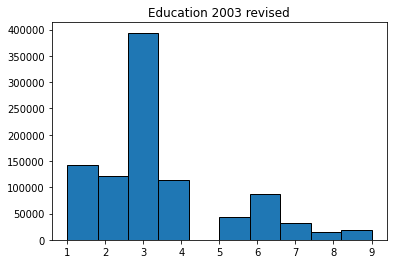

In [4]:
plt.hist(data_2005['education_2003_revision'], align='mid', edgecolor='black')
plt.title("Education 2003 revised")

Text(0.5, 1.0, 'Month of death')

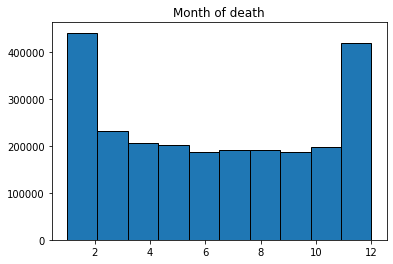

In [5]:
plt.hist(data_2005['month_of_death'], align='mid', edgecolor='black')
plt.title("Month of death")

In [23]:
# Finding the common columns in each dataset

def get_data_files() -> list:
    file_names = []
    for filename in os.listdir("/Users/joshloesch/school/fall2021/bds/bds_final_project/data/"):
        if filename.endswith(".csv"):
            file_names.append(filename)
    return file_names
            
file_names = get_data_files()

column_names = []
for filename in tqdm(file_names):
    data = pd.read_csv('../data/' + filename)
    s = set(data.columns)
    column_names.append([filename, s])

  0%|          | 0/11 [00:00<?, ?it/s]/Users/joshloesch/opt/anaconda3/envs/BDS_New/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (40,41,42,43,44,45,46,47,60,61,62,63,64,65,66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
  9%|▉         | 1/11 [00:17<02:53, 17.32s/it]/Users/joshloesch/opt/anaconda3/envs/BDS_New/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (40,41,42,43,44,45,46,47,60,61,62,63,64,65,66,67,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
 18%|█▊        | 2/11 [00:30<02:15, 15.03s/it]/Users/joshloesch/opt/anaconda3/envs/BDS_New/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (39,40,41,42,43,44,45,46,59,60,61,62,63,64,65,66,67) have mixed types.Specify dtype option on import or set low_mem

From the below cell we can see that all features in our dataset are the same except two:
icd_code_10th_revision & icd_code_10

I am planning on combining all of the data to increase our sample, I will remove these two features to have symmetry in the dataset

In [24]:
for s in range(len(column_names)):
    for i in range(len(column_names)):
        if i == s:
            continue
        else:
            print(f"Analyzing set {column_names[s][0]} and comparing it to set {column_names[i][0]}")
            print(column_names[s][1].symmetric_difference(column_names[i][1]))

Analyzing set 2010_data.csv and comparing it to set 2011_data.csv
set()
Analyzing set 2010_data.csv and comparing it to set 2007_data.csv
set()
Analyzing set 2010_data.csv and comparing it to set 2006_data.csv
set()
Analyzing set 2010_data.csv and comparing it to set 2014_data.csv
set()
Analyzing set 2010_data.csv and comparing it to set 2015_data.csv
set()
Analyzing set 2010_data.csv and comparing it to set 2009_data.csv
set()
Analyzing set 2010_data.csv and comparing it to set 2008_data.csv
set()
Analyzing set 2010_data.csv and comparing it to set 2005_data.csv
set()
Analyzing set 2010_data.csv and comparing it to set 2013_data.csv
set()
Analyzing set 2010_data.csv and comparing it to set 2012_data.csv
{'icd_code_10th_revision', 'icd_code_10'}
Analyzing set 2011_data.csv and comparing it to set 2010_data.csv
set()
Analyzing set 2011_data.csv and comparing it to set 2007_data.csv
set()
Analyzing set 2011_data.csv and comparing it to set 2006_data.csv
set()
Analyzing set 2011_data.csv 

### creating base model with only one data set

Data pre-processing, the codes associated with the data can be found in the data folder

In [26]:
data_2005.columns

Index(['resident_status', 'education_1989_revision', 'education_2003_revision',
       'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type',
       'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27',
       'age_recode_12', 'infant_age_recode_22',
       'place_of_death_and_decedents_status', 'marital_status',
       'day_of_week_of_death', 'current_data_year', 'injury_at_work',
       'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code',
       'place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
       'icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode',
       'number_of_entity_axis_conditions', 'entity_condition_1',
       'entity_condition_2', 'entity_condition_3', 'entity_condition_4',
       'entity_condition_5', 'entity_condition_6', 'entity_condition_7',
       'entity_condition_8', 'entity_condition_9', 'entity_condition_10',
       'entity_condition

In [32]:
# finding null values
nulls = []
names = []
for index, value in data_2005.isnull().sum().items():
    if value > 0:
        nulls.append(value)
        names.append(index)

<ipython-input-47-33766bc8844e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation = 90, ha="right")


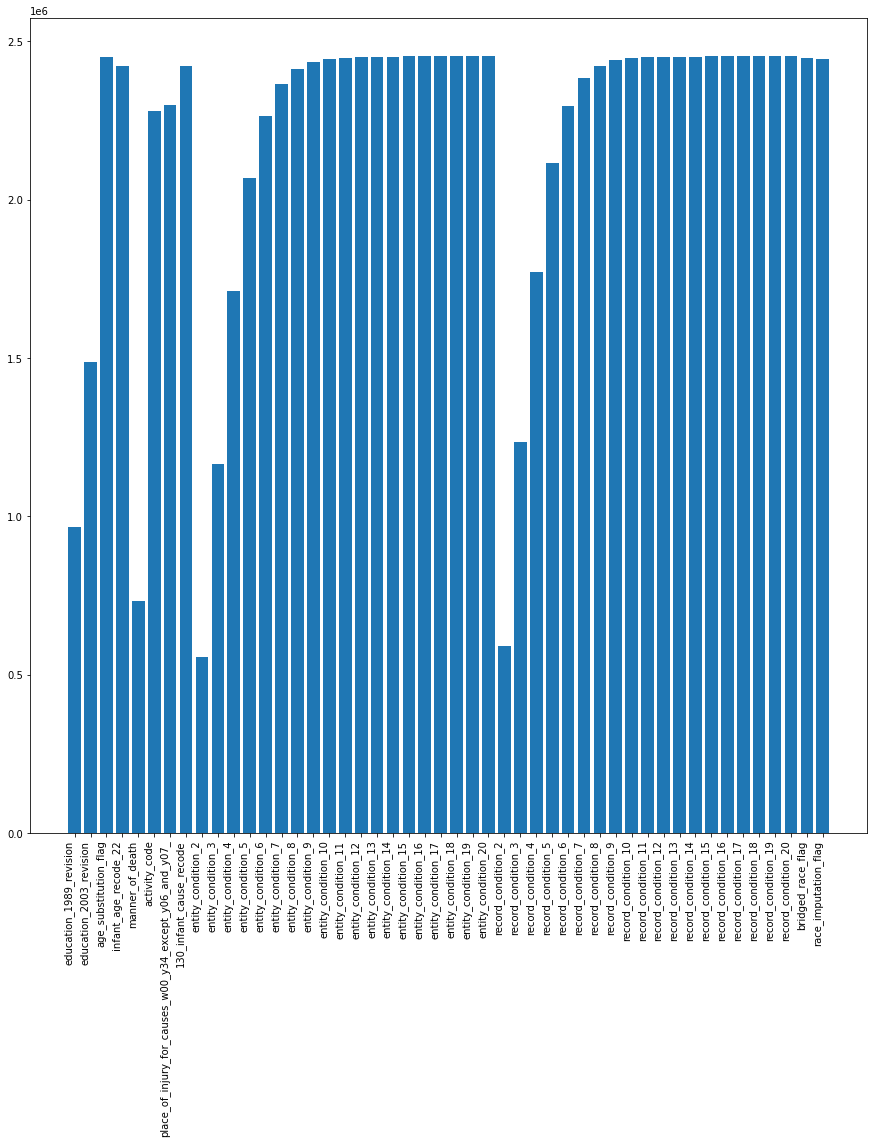

In [47]:
fig, ax = plt.subplots()

fig.set_size_inches(15, 15)
ax.bar(names, nulls)
ax.set_xticklabels(names, rotation = 90, ha="right")

plt.show()

We have many null values in the dataset, we will need to choose what to do with these

In [48]:
# looking at null value rows
data_2005.isnull().any(axis=1)

0          True
1          True
2          True
3          True
4          True
           ... 
2452501    True
2452502    True
2452503    True
2452504    True
2452505    True
Length: 2452506, dtype: bool

In [50]:
len(data_2005)

2452506

From this, we can see that every row has at least one null value